In [73]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('CC GENERAL.csv') 
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [22]:
# f = lambda x: re.sub('\D', '', x)
# df['CUST_ID'] = df['CUST_ID'].apply(f).astype(int)

In [23]:
df=df.drop('CUST_ID', axis=1)


In [29]:
df = df.dropna(subset=['CREDIT_LIMIT'])
df['MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())


C:\Users\MEZZER~1\AppData\Local\Temp/ipykernel_35588/2795775712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())


In [70]:
from sklearn.cluster import AgglomerativeClustering
Modul = AgglomerativeClustering(3)
dfc = df.copy()
dfc["CLUSTER_ID"] = Modul.fit_predict(df)

<AxesSubplot:xlabel='BALANCE', ylabel='ONEOFF_PURCHASES'>

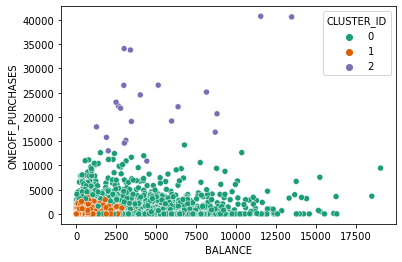

In [71]:
sns.scatterplot(data=dfc, x="BALANCE", y="ONEOFF_PURCHASES", hue="CLUSTER_ID", palette="Dark2")
# sns.pairplot(data=dfc, hue="CLUSTER_ID", palette="Dark2")

In [72]:
#4. Plot the dendrogram. Use k-means clustering. 
import scipy.cluster.hierarchy as shc
z=shc.linkage(df,method='complete')

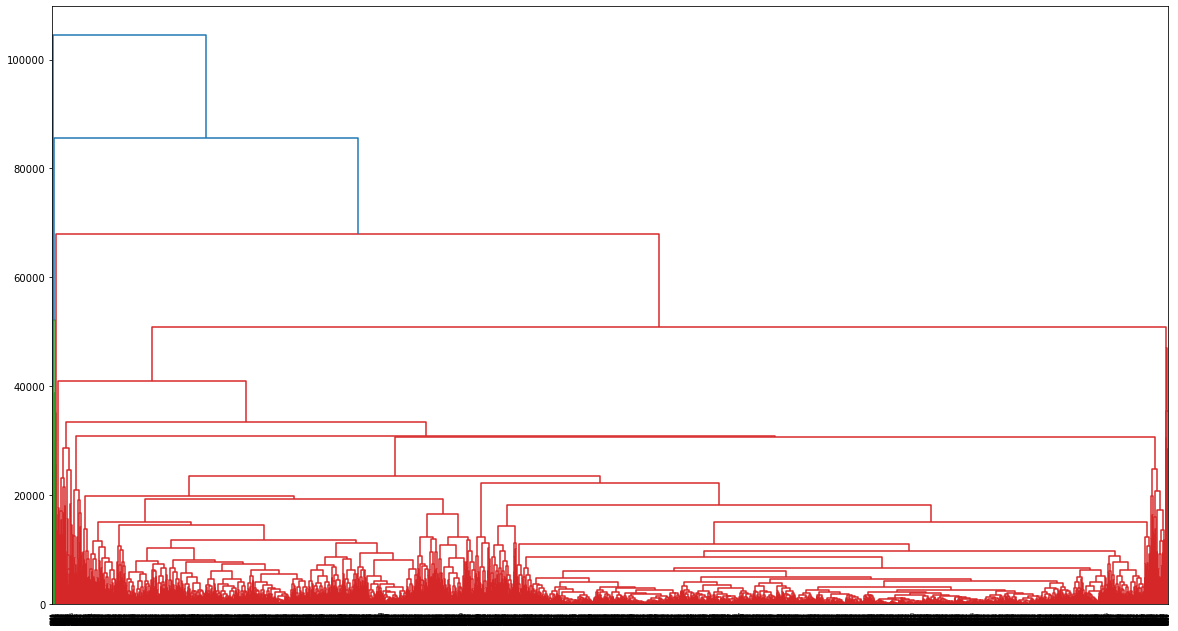

In [74]:
plt.figure(figsize=(20, 11))
dend = shc.dendrogram(z)

In [60]:
from sklearn.cluster import KMeans
Modul = KMeans(7)
dfc = df.copy()
dfc["CLUSTER_ID"] = Modul.fit_predict(df)

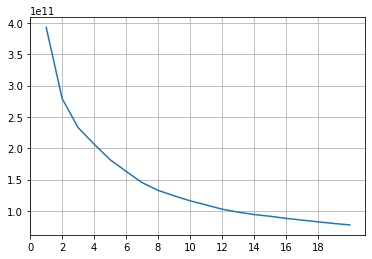

In [65]:
#5. Try different k values and select the best one. 


X = []
Y = []
for i in range(20):
    km = KMeans(i+1)
    km.fit(df)
    X.append(i+1)
    Y.append(km.inertia_)
    
ax = sns.lineplot(x=X, y=Y)
ax.set_xticks(range(0, 20, 2))
ax.grid()

<AxesSubplot:xlabel='BALANCE', ylabel='PURCHASES'>

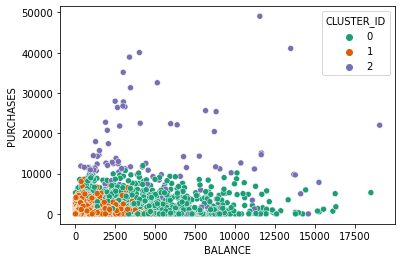

In [69]:
Modul = KMeans(3)
dfc = df.copy()
dfc["CLUSTER_ID"] = Modul.fit_predict(df)
sns.scatterplot(data=dfc, x="BALANCE", y="PURCHASES", hue="CLUSTER_ID", palette="Dark2")